# MODEL ON IMDB BOX OFFICE PREDICTION

#### Data pre-processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
movies = pd.read_csv(r"D:\user\Downloads\ml\imdb_movies_data\movies.csv")
credits = pd.read_csv(r"D:\user\Downloads\ml\imdb_movies_data\credits.csv")
data=movies.merge(credits, on='title')

In [2]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
data.drop(columns=['overview','spoken_languages','status','tagline','title','id','movie_id','crew','homepage','keywords','original_language','original_title','production_countries','production_companies'], inplace=True)

In [4]:
data.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.809000e+03,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000
mean,2.902780e+07,21.491664,8.227511e+07,106.882255,6.092514,690.331670
std,4.070473e+07,31.803366,1.628379e+08,22.602535,1.193989,1234.187111
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.800000e+05,4.667230,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.350529,9.291317e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [5]:
data.replace(0, np.nan, inplace=True)
data.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [6]:
data.dtypes

budget          float64
genres           object
popularity      float64
release_date     object
revenue         float64
runtime         float64
vote_average    float64
vote_count      float64
cast             object
dtype: object

#### Correlation Heatmap

<AxesSubplot:>

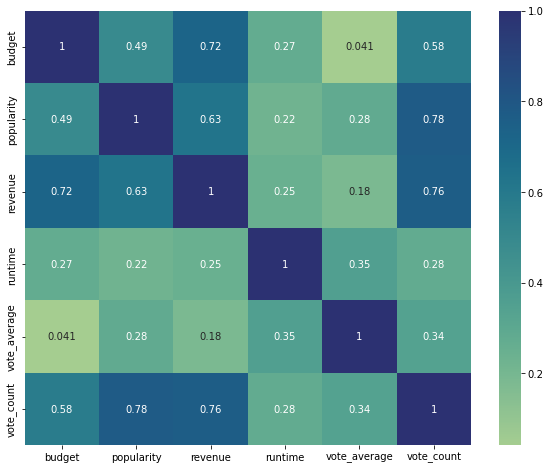

In [7]:
plt.figure(figsize=(10,8)) 
sns.heatmap(data=data.corr(), annot=True, cmap='crest')

#### Data Cleaning

In [8]:
import ast

def convert(obj):
    L = ""
    for i in ast.literal_eval(obj):
        L = L + i['name'] + ","
    L = L[:-1]
    return L

def convert3(obj):
    L = ""
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L = L + i['name'] + ","
            counter+=1
        else:
            break
    L = L[:-1]
    return L

In [9]:
data['genres']=data['genres'].apply(convert)
data['cast']=data['cast'].apply(convert3)

In [10]:
data['inputDate'] = pd.to_datetime(data['release_date'])
data['day_of_week'] = data['inputDate'].dt.dayofweek

In [11]:
data['actor_1_name'] = data['cast'].str.split(',').str[0]
data['actor_2_name'] = data['cast'].str.split(',').str[1]
data['actor_3_name'] = data['cast'].str.split(',').str[2]
data["star_popularity"]=data.groupby('actor_1_name')['actor_1_name'].transform('count') + data.groupby('actor_2_name')['actor_2_name'].transform('count') + data.groupby('actor_3_name')['actor_3_name'].transform('count')

In [12]:
data = pd.concat([data.drop(['genres'], 1), data['genres'].str.get_dummies(sep=",")], 1)

C:\Users\sumee\AppData\Local\Temp\ipykernel_5104\1179145438.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = pd.concat([data.drop(['genres'], 1), data['genres'].str.get_dummies(sep=",")], 1)
C:\Users\sumee\AppData\Local\Temp\ipykernel_5104\1179145438.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data.drop(['genres'], 1), data['genres'].str.get_dummies(sep=",")], 1)


In [13]:
data.head()

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,cast,inputDate,day_of_week,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000.0,150.437577,2009-12-10,2.787965e+09,162.0,7.2,11800.0,"Sam Worthington,Zoe Saldana,Sigourney Weaver",2009-12-10,3.0,...,0,0,0,0,0,1,0,0,0,0
1,300000000.0,139.082615,2007-05-19,9.610000e+08,169.0,6.9,4500.0,"Johnny Depp,Orlando Bloom,Keira Knightley",2007-05-19,5.0,...,0,0,0,0,0,0,0,0,0,0
2,245000000.0,107.376788,2015-10-26,8.806746e+08,148.0,6.3,4466.0,"Daniel Craig,Christoph Waltz,Léa Seydoux",2015-10-26,0.0,...,0,0,0,0,0,0,0,0,0,0
3,250000000.0,112.312950,2012-07-16,1.084939e+09,165.0,7.6,9106.0,"Christian Bale,Michael Caine,Gary Oldman",2012-07-16,0.0,...,0,0,0,0,0,0,0,1,0,0
4,260000000.0,43.926995,2012-03-07,2.841391e+08,132.0,6.1,2124.0,"Taylor Kitsch,Lynn Collins,Samantha Morton",2012-03-07,2.0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
corr_mat=data.corr()
corr_mat['revenue'].sort_values(ascending=False)

revenue            1.000000
vote_count         0.764616
budget             0.719628
popularity         0.628176
Adventure          0.343594
star_popularity    0.296066
runtime            0.249850
Fantasy            0.214344
Animation          0.201796
Action             0.199232
vote_average       0.184298
Family             0.180271
Science Fiction    0.150503
War               -0.003363
Thriller          -0.010255
Mystery           -0.010654
TV Movie          -0.020222
Western           -0.032107
History           -0.032982
Foreign           -0.038024
Comedy            -0.038750
Music             -0.042343
Crime             -0.042836
Romance           -0.061906
Documentary       -0.071034
Horror            -0.083034
day_of_week       -0.145773
Drama             -0.174566
Name: revenue, dtype: float64

In [15]:
data=data[['budget','revenue','popularity','runtime','vote_count','star_popularity','Action','Adventure','Animation','Family','Fantasy','Science Fiction','Drama','day_of_week']]

#### Outlier Removal

In [16]:
upper_limit = 1e+09
lower_limit = 1e+03
data['revenue'] = np.where(
    data['revenue'] > upper_limit,
    upper_limit,
    np.where(
        data['revenue'] < lower_limit,
        lower_limit,
        data['revenue']
    )
)

#### Null Value Removal

In [17]:
data.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [18]:
data.isnull().sum()

budget             0
revenue            0
popularity         0
runtime            0
vote_count         0
star_popularity    0
Action             0
Adventure          0
Animation          0
Family             0
Fantasy            0
Science Fiction    0
Drama              0
day_of_week        0
dtype: int64

#### Data visualization 

C:\Users\sumee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

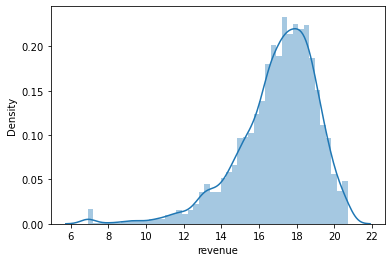

In [19]:
sns.distplot(np.log(data['revenue']))

#### Model Building And Evaluation

In [20]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
stand_data=scaling.fit_transform(data)
stand_df = pd.DataFrame(stand_data, columns=data.columns)

In [21]:
from sklearn.model_selection import train_test_split
X=stand_df.drop(columns=['revenue'])
y=stand_df['revenue']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.14,random_state=2)

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### Linear Regression

In [23]:
model = LinearRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7662152280304884
MAE 0.2958875059157485


#### K Nearest Neighbors Regression

In [24]:
model = KNeighborsRegressor(n_neighbors=10)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7580563169508183
MAE 0.30359828715979903


#### Decision Tree Regression

In [25]:
model = DecisionTreeRegressor(max_depth=8)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6306920294054887
MAE 0.33491509993178625


#### Random Forest Regression

In [26]:
model = RandomForestRegressor(n_estimators=96,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.8,
                              max_depth=24)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8139856364760709
MAE 0.27721615790381215
